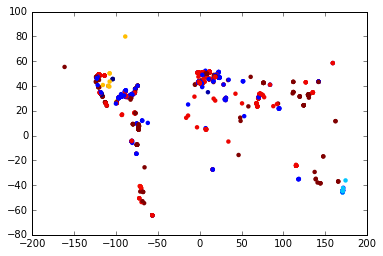

Index([u'collection_no', u'collection.authorizer', u'license',
       u'collection.reference_no', u'latdec', u'lngdec', u'period', u'epoch',
       u'stage', u'ma_max', u'ma_min', u'lithology1', u'lithology2',
       u'environment', u'tectonic_setting', u'geology_comments'],
      dtype='object')
1163
/Users/wenchaocao/Research/6_CookieCutting_Corrections/45/TopologyMethod_45Ma/5_Reconstructed_Paleogeog_GolonkaIDs_45Ma//sm_fig56_49_37_reconstructed_43.00Ma.shp
/Users/wenchaocao/Research/6_CookieCutting_Corrections/45/TopologyMethod_45Ma/5_Reconstructed_Paleogeog_GolonkaIDs_45Ma//lm_fig56_49_37_reconstructed_43.00Ma.shp
/Users/wenchaocao/Research/6_CookieCutting_Corrections/45/TopologyMethod_45Ma/5_Reconstructed_Paleogeog_GolonkaIDs_45Ma//m_fig56_49_37_reconstructed_43.00Ma.shp
/Users/wenchaocao/Research/6_CookieCutting_Corrections/45/TopologyMethod_45Ma//Golonka_Rotation_CookieCutting_2015_43Ma.rot


In [345]:
import pygplates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pbdb = pd.read_csv('/Users/wenchaocao/Research/6_CookieCutting_Corrections/Fossil_Collections_Genus_PBDB_2500_0Ma/2500Ma-collections.csv')

recon_time = 45
FigNum = 56
age_max = 49
age_min = 37
Rotation_time = 43

#extract subsets
pbdb_subset = pbdb[(pbdb.ma_max<=age_max) & (pbdb.ma_min>=age_min)] 

#scatter the fossils points
plt.scatter(pbdb_subset.lngdec,pbdb_subset.latdec,c=pbdb_subset.ma_max,edgecolors='')
plt.show()

#print pbdb_subset
print pbdb_subset.columns
print len(pbdb_subset)

###########
base_directory = '/Users/wenchaocao/Research/6_CookieCutting_Corrections/'+str(recon_time)+'/TopologyMethod_'+str(recon_time)+'Ma/5_Reconstructed_Paleogeog_GolonkaIDs_'+str(recon_time)+'Ma/'
ShallowMarine_Filename = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (base_directory,FigNum,age_max,age_min,Rotation_time)
Landmass_Filename = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (base_directory,FigNum,age_max,age_min,Rotation_time)
Mountain_Filename = '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (base_directory,FigNum,age_max,age_min,Rotation_time)
#Icesheet_Filename = '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (base_directory,FigNum,age_max,age_min,Rotation_time)

print ShallowMarine_Filename
print Landmass_Filename
print Mountain_Filename
#print Icesheet_Filename
#ShallowMarine_Filename = base_directory+'/sm_fig36_224_203_reconstructed_224.80Ma.shp'
#Landmass_Filename = base_directory+'/lm_fig36_224_203_reconstructed_224.80Ma.shp'
#Mountain_Filename = base_directory+'/m_fig36_224_203_reconstructed_224.80Ma.shp'
#Icesheet_Filename = base_directory+'/i_fig36_224_203_reconstructed_224.80Ma.shp'

OutputShapefileName = 'Fossils_TestingReconPaleogeog_GolonkaIDs_'+str(recon_time)+'Ma.shp'

#Golonka rotation file
base_directory_rotation = '/Users/wenchaocao/Research/6_CookieCutting_Corrections/'+str(recon_time)+'/TopologyMethod_'+str(recon_time)+'Ma/'
#rotation_filename_for_fossils = '%s/Golonka_master94c1_Africa-Rel_Revised_%dMa.rot' % (base_directory_rotation,Rotation_time)
rotation_filename_for_fossils = '%s/Golonka_Rotation_CookieCutting_2015_%dMa.rot' % (base_directory_rotation,Rotation_time)
print rotation_filename_for_fossils

#Golonka's static polygons
static_polygons = '/Users/wenchaocao/Research/6_CookieCutting_Corrections/Orignial_RotaCoastConti_Golonka/Golonka_StaticPolygons.shp'

# In some cases, the paleogeographies need to be reconstructed (consistent with the fossils), in some cases not
# hence, here we can specify a 'fake' rotiation file to avoid reconstructing the paleogeography
# polygons for the point in polygon test if they are already reconstructed
rotation_filename_for_paleogeog = '/Users/wenchaocao/Desktop/New_Rotation.rot'



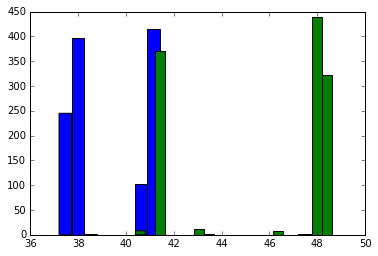

In [346]:
plt.hist(pbdb_subset.ma_min,20)
plt.hist(pbdb_subset.ma_max,20)
plt.show()

#pbdb_subset


In [347]:
# Load the rotation file and static polygons for the reconstruction model we want to use
# Then, create a gplates feature containing the fossils, and assign-plate ids to them
# using this reconstruction model
# Finally, reconstruct the points to the desired testing time

rotation_model = pygplates.RotationModel(rotation_filename_for_fossils)

point_features = []

for index,row in pbdb_subset.iterrows():
    point = pygplates.PointOnSphere(float(row.latdec),float(row.lngdec))
    #print row.LONG
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    point_feature.set_shapefile_attribute('Environ',str(row.environment))
    point_feature.set_shapefile_attribute('lithology1',str(row.lithology1))
    point_feature.set_shapefile_attribute('lithology2',str(row.lithology2))
    point_feature.set_shapefile_attribute('coll_no',str(row.collection_no))
    point_feature.set_shapefile_attribute('coll_auth',str(row['collection.authorizer']))
    point_feature.set_shapefile_attribute('coll_refno',str(row['collection.reference_no']))
    point_feature.set_shapefile_attribute('ma_max',row.ma_max)
    point_feature.set_shapefile_attribute('ma_min',row.ma_min)
    point_feature.set_shapefile_attribute('period',str(row.period))
    point_feature.set_shapefile_attribute('epoch',str(row.epoch))
    point_feature.set_shapefile_attribute('stage',str(row.stage))
    point_feature.set_shapefile_attribute('GolEnv','Unknown')
    point_feature.set_shapefile_attribute('pbdbEnv','Unknown')
    point_feature.set_shapefile_attribute('Match',0)
    point_feature.set_shapefile_attribute('FromAge',age_max) #added on 6/12/2016
    point_feature.set_shapefile_attribute('ToAge',age_min) #added on 6/12/2016
    point_feature.set_valid_time(age_max,age_min)
    point_features.append(point_feature)

print len(point_features)

# The partition points function can then be used as before
partitioned_point_features = pygplates.partition_into_plates(static_polygons,
                                                       rotation_model,
                                                       point_features) 

# If partitioned feature has plate id = 0, we throw it away 
partitioned_point_features_not_zero = []
partitioned_point_features_zero = []
for point_feature in partitioned_point_features:
    if point_feature.get_reconstruction_plate_id() != 0:
        partitioned_point_features_not_zero.append(point_feature)
    else:
        partitioned_point_features_zero.append(point_feature)

# Create a reconstructed version of the fossil features 

reconstructed_point_features = [] #'/Users/wenchaocao/Research/Test_DeleteSoon/reconstructed_point_features_33Ma.shp' #
pygplates.reconstruct(partitioned_point_features_not_zero,
                      rotation_model,
                      reconstructed_point_features,
                      Rotation_time)

print len(partitioned_point_features_not_zero)
print len(partitioned_point_features_zero)


1163
1163
0


In [348]:
# This cell contains the mapping between paleo-environments descriptions in PBDB and our own system
##### List and filename for Shallow Marine

shallow_marine_list = ['marine indet.',
            'carbonate indet.',
            'peritidal',
            'shallow subtidal indet.',
            'open shallow subtidal',
            'lagoonal/restricted shallow subtidal',
            'sand shoal',
            'reef, buildup or bioherm',
            'perireef or subreef',
            'intrashelf/intraplatform reef',
            'platform/shelf-margin reef',
            'slope/ramp reef',
            'basin reef',
            'deep subtidal ramp',
            'deep subtidal shelf',
            'deep subtidal indet.',
            'offshore ramp',
            'offshore shelf',
            'offshore indet.',
            'slope',
            'basinal (carbonate)',
            'basinal (siliceous)',
            'marginal_marine_indet.',
            'coastal indet.',
            'estuary/bay',
            'lagoonal',
            'paralic indet.',
            'delta plain', ##added recently
            'interdistributary bay',
            'delta front',
            'prodelta',
            'deltaic indet.',
            'foreshore',
            'shoreface',
            'transition zone/lower shoreface',
            'offshore',
            'submarine fan',
            'basinal (siliciclastic)',
            'deep-water indet.']

##### List and filename for features: landmass, mountain and icesheet

terrestrial_list = ['terrestrial indet.',
            'fluvial indet.',
            'alluvial fan',
            'channel lag',
            'coarse channel fill',
            'fine channel fill',
            '"channel"',
            'wet floodplain',
            'dry floodplain',
            '"floodplain"',
            'crevasse splay',
            'levee',
            'mire/swamp',
            'fluvial-lacustrine_indet.',
            'delta plain',
            'fluvial-deltaic_indet.',
            'lacustrine - large',
            'lacustrine - small',
            'pond',
            'crater lake',
            'lacustrine_delta_plain',
            'lacustrine_interdistributary_bay',
            'lacustrine_delta_front',
            'lacustrine_pro-delta',
            'lacustrine_deltaic_indet.',
            'lacustrine indet.',
            'dune',
            'interdune',
            'loess',
            'eolian indet.',
            'cave',
            'fissure fill',
            'sinkhole',
            'karst indet.',
            'tar',
            'spring',
            'glacial']

mountain_list = terrestrial_list

#icesheet_list = terrestrial_list

##### End

In [349]:
# define a function that will do the consistency check
# The input can be any paleogeography polygon filename, assuming that all polygons in that feature
# are the same paleoenvironment (e.g. all shallow marine).
# The test finds whether each paleobiology point is within the polygons or not
# The 'success' for each point also depends on the lookup table and the 'env_num'
# [ie, is the pbdb environment for that point consistent with the polygon environment]
def DoPaleogeographyTest(reconstructed_point_features,Paleogeography_Filename,rotation_model,recon_time,environment_list,environment_label,env_num):

    PaleoGeog_Features = pygplates.FeatureCollection(Paleogeography_Filename)
    #pygplates.PlatePartitioner(): Partition features or geometries into plates.
    plate_partitioner = pygplates.PlatePartitioner(PaleoGeog_Features, rotation_model, reconstruction_time=recon_time) 

    tested_features = []
    untested_features = []

    for reconstructed_point in reconstructed_point_features:
        #plate_partitioner.partition_point(): if point is contained by any partitioning plates
        #reconstructed_point.get_reconstructed_geometry() means fossil points
        result = plate_partitioner.partition_point(reconstructed_point.get_reconstructed_geometry())
        if result is not None:

            # Get the environment for the point
            feature_environment = reconstructed_point.get_feature().get_shapefile_attribute('Environ')

            # See if the environment of the point matches the environment of the polygons 
            env_comparison = any(feature_environment in env for env in environment_list)
            reconstructed_point.get_feature().set_shapefile_attribute('GolEnv',environment_label)
            # Set the test indicator to have a value where the sign reflects the success of the test, 
            # while the absolute value depends on the environment
            if env_comparison is True:
                reconstructed_point.get_feature().set_shapefile_attribute('Match',env_num)
            else:
                reconstructed_point.get_feature().set_shapefile_attribute('Match',env_num*-1)
            reconstructed_point.get_feature().set_shapefile_attribute('PlateID',reconstructed_point.get_feature().get_reconstruction_plate_id())
            tested_features.append(reconstructed_point.get_feature())
            
        else:
            untested_features.append(reconstructed_point)
        
    # return reconstructed, tested features (with test results and plate ids assigned)
    return tested_features,untested_features
 

In [350]:

# call the function for as many times as we have different paleoenvironment features 

remaining_features = reconstructed_point_features

#i_features,remaining_features = DoPaleogeographyTest(remaining_features,
#                                  Icesheet_Filename,
#                                  rotation_filename_for_paleogeog,
#                                  Rotation_time,
#                                  icesheet_list,
#                                  'Icesheet',4)

#print len(i_features),len(remaining_features)

m_features,remaining_features = DoPaleogeographyTest(remaining_features,
                                  Mountain_Filename,
                                  rotation_filename_for_paleogeog,
                                  Rotation_time,
                                  mountain_list,
                                  'Mountain',3)
#print 'Fossils in mountain:'
print len(m_features),len(remaining_features)

lm_features,remaining_features = DoPaleogeographyTest(remaining_features,
                                   Landmass_Filename,
                                   rotation_filename_for_paleogeog,
                                   Rotation_time,
                                   terrestrial_list,
                                   'Landmass',2)
print len(lm_features),len(remaining_features)

sm_features,remaining_features = DoPaleogeographyTest(remaining_features,
                                   ShallowMarine_Filename,
                                   rotation_filename_for_paleogeog,
                                   Rotation_time,
                                   shallow_marine_list,
                                   'ShallowMarine',1)
print len(sm_features),len(remaining_features)

# Catch all the features that are not in any polygon
unknown_features = []
for reconstructed_point in reconstructed_point_features:
    if reconstructed_point.get_feature().get_shapefile_attribute('GolEnv')=='Unknown':
        reconstructed_point.get_feature().set_shapefile_attribute('PlateID',reconstructed_point.get_feature().get_reconstruction_plate_id())
        unknown_features.append(reconstructed_point.get_feature())
print len(unknown_features)

#print 'Sum of tested fossils:'
#print 
#print len(pbdb_subset)

207 956
401 555
437 118
118


In [351]:
# Before saving to a single file, put together all the features into one collection
all_features = []
for feature in sm_features:
    all_features.append(feature)
for feature in lm_features:
    all_features.append(feature)
for feature in m_features:
    all_features.append(feature)
#for feature in i_features:
#    all_features.append(feature)
for feature in unknown_features:
    all_features.append(feature)

print len(all_features)

# Also before saving to file, assign the pbdb 'coarse' environment (based on the lookup table)
# to each point, so that in GIS we can distinguish simply between 'Terrestrial' and
# 'Marine' fossils
for feature in all_features:
    # Get the environment for the point
    feature_environment = feature.get_shapefile_attribute('Environ')

    # See if the environment of the point matches the environment of the polygons 
    env_comparison = any(feature_environment in env for env in shallow_marine_list)
    if env_comparison is True:
        feature.set_shapefile_attribute('pbdbEnv','ShallowMarine')
    # See if the environment of the point matches the environment of the polygons 
    env_comparison = any(feature_environment in env for env in terrestrial_list)
    if env_comparison is True:
        feature.set_shapefile_attribute('pbdbEnv','Terrestrial')
        
# Save to file, all features lumped together and reconstructed using the rotation model
#previous tests do not output reconstructed fossils
pygplates.reconstruct(all_features,
                      rotation_model,
                      OutputShapefileName,
                      Rotation_time)

print len(all_features)

1163
1163


In [352]:
#### Get a score of success or failure based on the pbdb fossil type (terrestrial or marine)
print 'Time interval = %d' % recon_time
print ''

ShallowMarineTrue = 0
ShallowMarineFalse = 0
InvalidFossils = 0
for feature in all_features:
    #print feature.get_shapefile_attribute('pbdbEnv')
    if feature.get_shapefile_attribute('pbdbEnv')=='ShallowMarine':
        if feature.get_shapefile_attribute('Match')>0:
            ShallowMarineTrue+=1
        elif feature.get_shapefile_attribute('Match')<0:
            ShallowMarineFalse+=1
        else:
            InvalidFossils+=1
            
print 'PBDB Marine Fossils:'
print 'Consistent = %d' % ShallowMarineTrue
print 'Inconsistent = %d' % ShallowMarineFalse  
print ''

TerrestrialTrue = 0
TerrestrialFalse = 0
for feature in all_features:
    if feature.get_shapefile_attribute('pbdbEnv')=='Terrestrial':
        if feature.get_shapefile_attribute('Match')>0:
            TerrestrialTrue+=1
        elif feature.get_shapefile_attribute('Match')<0:
            TerrestrialFalse+=1
        else:
            InvalidFossils+=1
            
print 'PBDB Terrestrial Fossils:'
print 'Consistent = %d' % TerrestrialTrue
print 'Inconsistent = %d' % TerrestrialFalse  
print ''

print 'InvalidFossils = %d'% InvalidFossils
print ''

print 'Number of tested fossils:'
print ShallowMarineTrue + ShallowMarineFalse + TerrestrialTrue + TerrestrialFalse + InvalidFossils + len(partitioned_point_features_zero)
print ''
print 'Sum of Fossils extracted from PBDB:'
print len(pbdb_subset)


Time interval = 45

PBDB Marine Fossils:
Consistent = 394
Inconsistent = 335

PBDB Terrestrial Fossils:
Consistent = 273
Inconsistent = 43

InvalidFossils = 118

Number of tested fossils:
1163

Sum of Fossils extracted from PBDB:
1163


In [353]:
### 